<a href="https://colab.research.google.com/github/MohammadAminRahimZadeh/MachineLearning2023/blob/main/Mini_project1/q03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

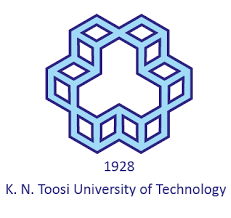
# ***Digital systems basics Mini poject 01 Q1***

**KNTU E.E engineering faculty _ 2023 November**

*Author: Mohammad Amin Rahim Zadeh*

*Student ID: 9822103*

Importing the dataset.

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1MSetIDmXSN28my5ffOXyqqLaCSb2QaPC

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1MSetIDmXSN28my5ffOXyqqLaCSb2QaPC
To: /content/heart_disease_health_indicators.csv
100% 11.8M/11.8M [00:00<00:00, 154MB/s]


Importing libraries.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv('/content/heart_disease_health_indicators.csv')
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253656,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
253657,0,0,1,1,24,0,0,0,0,0,...,1,0,3,0,0,0,0,7,5,3
253658,0,0,0,0,27,0,0,0,1,0,...,1,1,2,0,0,0,0,3,6,5
253659,0,0,1,1,37,0,0,2,0,0,...,1,0,4,0,0,0,0,6,4,1


Checking for missing data.

In [ ]:
null = df.isnull().sum()
null

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

picking 200 random samples and forming features and label dataframes.

In [ ]:
random_data = df.sample(n = 200)

feature_columns = ["HighBP", "HighChol","BMI", "Smoker", "Diabetes", "PhysActivity", "HvyAlcoholConsump", "MentHlth", "Age" ]
features = random_data[feature_columns]

label = random_data["HeartDiseaseorAttack"]
label = np.array(label)
label = label.reshape(-1,1)

Normalizing the data.

In [ ]:
scaler = MinMaxScaler()

scaler.fit(features)
x = scaler.transform(features)

scaler.fit(label)
y = scaler.transform(label)

Spliting.

In [ ]:
xc1 = x[0:100]
yc1 = y[0:100]
xc2 = x[100:200]
yc2 = y[100:200]

Class 1 processing.




Train-Test spliting.

In [ ]:
xc1_train, xc1_test, yc1_train, yc1_test = train_test_split(xc1, yc1, test_size = 0.3)
print("___Train Size____" , "\n")
print(xc1_train.shape, yc1_train.shape,"\n")
print("___Test Size_____","\n")
print(xc1_test.shape,yc1_test.shape)

___Train Size____ 

(70, 9) (70, 1) 

___Test Size_____ 

(30, 9) (30, 1)


Logistic regression model.

In [ ]:
clf11 = LogisticRegression(random_state=3)
clf11.fit(xc1_train, yc1_train)
pred11 = clf11.predict(xc1_test)
accuracy_score(yc1_test, pred11)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8666666666666667

Classification report.

In [ ]:
print("Classification Report:")
print(classification_report(yc1_test, pred11))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        26
         1.0       0.00      0.00      0.00         4

    accuracy                           0.87        30
   macro avg       0.43      0.50      0.46        30
weighted avg       0.75      0.87      0.80        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix.

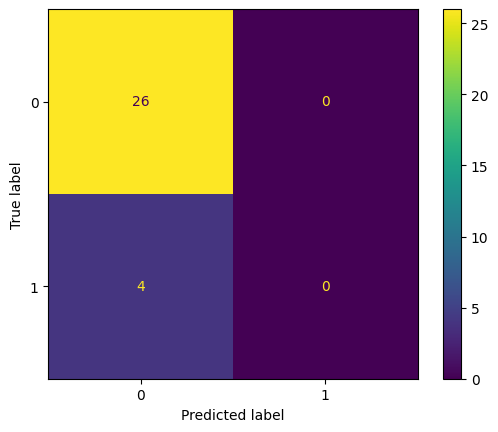

In [ ]:
confusion_matrix = metrics.confusion_matrix(yc1_test, pred11)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

SGD Model.

In [ ]:
clf12 = SGDClassifier()
clf12.fit(xc1_train, yc1_train)
pred12 = clf12.predict(xc1_test)
accuracy_score(yc1_test, pred12)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8666666666666667

Classification report.

In [ ]:
print("Classification Report:")
print(classification_report(yc1_test, pred12))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91        26
         1.0       0.00      0.00      0.00         4

    accuracy                           0.83        30
   macro avg       0.43      0.48      0.45        30
weighted avg       0.75      0.83      0.79        30



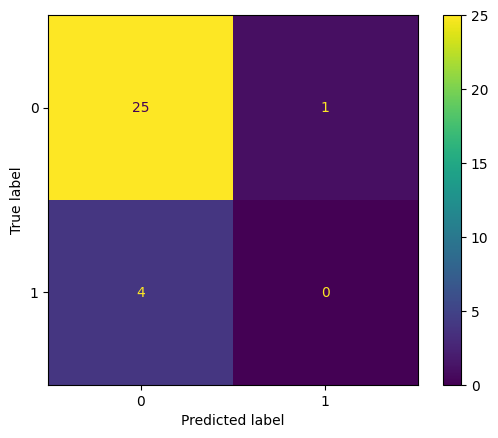

In [ ]:
confusion_matrix = metrics.confusion_matrix(yc1_test, pred12)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

Class 2 processing.

Train-Test spliting.

In [ ]:
xc2_train, xc2_test, yc2_train, yc2_test = train_test_split(xc2, yc2, test_size = 0.3)
print("___Train Size____" , "\n")
print(xc2_train.shape, yc2_train.shape,"\n")
print("___Test Size_____","\n")
print(xc2_test.shape, yc2_test.shape)

___Train Size____ 

(70, 9) (70, 1) 

___Test Size_____ 

(30, 9) (30, 1)


Logistic regression model.

In [ ]:
clf21 = LogisticRegression(random_state=3)
clf21.fit(xc2_train, yc2_train)
pred21 = clf21.predict(xc2_test)
accuracy_score(yc2_test, pred21)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9

Classification report.

In [ ]:
print("Classification Report:")
print(classification_report(yc2_test, pred21))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        27
         1.0       0.00      0.00      0.00         3

    accuracy                           0.90        30
   macro avg       0.45      0.50      0.47        30
weighted avg       0.81      0.90      0.85        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix.

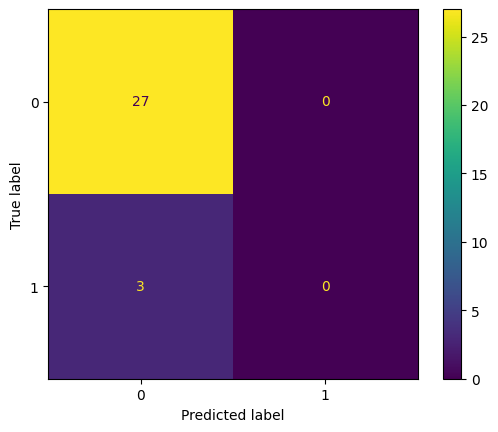

In [ ]:
confusion_matrix = metrics.confusion_matrix(yc2_test, pred21)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

SGD Model.

In [ ]:
clf22 = SGDClassifier()
clf22.fit(xc2_train, yc2_train)
pred22 = clf22.predict(xc2_test)
accuracy_score(yc2_test, pred22)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8333333333333334

Classification report.

In [ ]:
print("Classification Report:")
print(classification_report(yc2_test, pred22))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        27
         1.0       0.00      0.00      0.00         3

    accuracy                           0.83        30
   macro avg       0.45      0.46      0.45        30
weighted avg       0.80      0.83      0.82        30



Confusion Matrix.

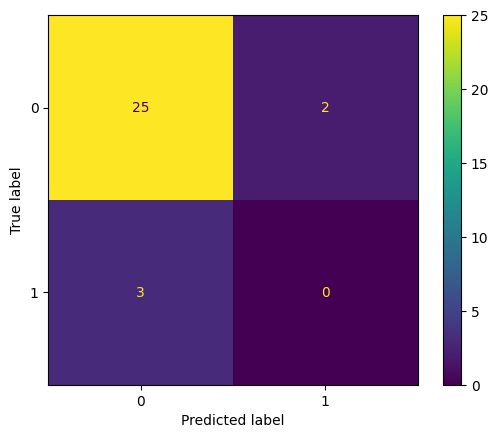

In [ ]:
confusion_matrix = metrics.confusion_matrix(yc2_test, pred22)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import log_loss
y_prob1 = clf11.predict_proba(xc1_test)
loss = log_loss(yc1_test, y_prob1)
print("Log Loss:", loss)

Log Loss: 0.45982582089710206


In [ ]:
for epoch in range(1000):
    clf12.partial_fit(xc1_train, yc1_train, classes=np.unique(y))
    decision_values = clf12.decision_function(xc1_train)
    loss = hinge_loss(yc1_train, decision_values)
    loss_history.append(loss)

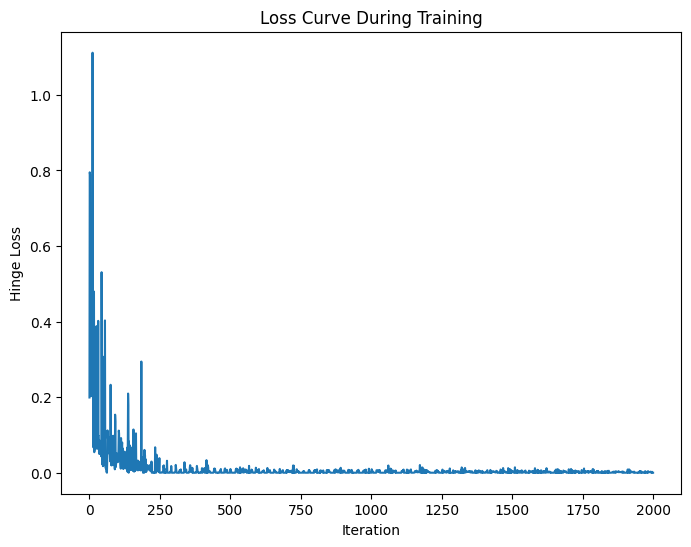

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(loss_history)
plt.title('Loss Curve During Training')
plt.xlabel('Iteration')
plt.ylabel('Hinge Loss')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'Precision: {precision_score(yc1_test, pred11)}')
print(f'F1 Score: {f1_score(yc1_test, pred11)}')
print(f'Recall: {recall_score(yc1_test, pred11)}')